In [2]:
import tensorflow as tf
import os
from efficientnet import EfficientNetB3

# Define the paths to your dataset
data_dir = 'E:/datanew'

# Define the image size, batch size and number of epochs
img_size = (224, 224)
batch_size = 32
epochs = 10

# Define the label names
label_names = sorted(os.listdir(data_dir))

# Define the ImageDataGenerator for preprocessing the images
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 validation_split=0.2)

# Define the training and validation sets
train_generator = data_generator.flow_from_directory(data_dir,
                                                      target_size=img_size,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      classes=label_names,
                                                      subset='training')

val_generator = data_generator.flow_from_directory(data_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=label_names,
                                                    subset='validation')

# Define the pre-trained model
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet',
                                         include_top=False,
                                         input_shape=(img_size[0], img_size[1], 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)


Found 1291 images belonging to 22 classes.
Found 314 images belonging to 22 classes.
Epoch 1/10
41/41 [==============================] - 779s 19s/step - loss: 1.7187 - accuracy: 0.5438 - val_loss: 1.1706 - val_accuracy: 0.6369
Epoch 2/10
41/41 [==============================] - 933s 23s/step - loss: 0.8138 - accuracy: 0.7715 - val_loss: 0.6885 - val_accuracy: 0.7962
Epoch 3/10
41/41 [==============================] - 808s 20s/step - loss: 0.5307 - accuracy: 0.8319 - val_loss: 0.6877 - val_accuracy: 0.7962
Epoch 4/10
41/41 [==============================] - 764s 19s/step - loss: 0.3903 - accuracy: 0.8699 - val_loss: 0.4952 - val_accuracy: 0.8662
Epoch 5/10
41/41 [==============================] - 764s 19s/step - loss: 0.3208 - accuracy: 0.9040 - val_loss: 0.5366 - val_accuracy: 0.8567
Epoch 6/10
41/41 [==============================] - 764s 19s/step - loss: 0.3193 - accuracy: 0.9016 - val_loss: 0.5712 - val_accuracy: 0.8280
Epoch 7/10
41/41 [==============================] - 761s 19s/st

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

10/10 [==============================] - 43s 4s/step


In [9]:
# confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# print(confusion_mtx)
import sklearn
cm=sklearn.metrics.confusion_matrix(y_true,y_pred_classes)
print(cm)

[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  3  0  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  7  0  1  0  0  0  2  0  0  0  1  1  2  0  0  0  1  0  0]
 [ 0  3  9 67  1  7  2  1  2  2  3 12  1  6  3  7  6  2  3  1  1  5]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  1  1  6  2  1  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  1  0  0  1  1  0  0  0  1  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0  0  1  0  0  1  0  1  0  1  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  1  2  0  2  0  0  0  1  1  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  3  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0

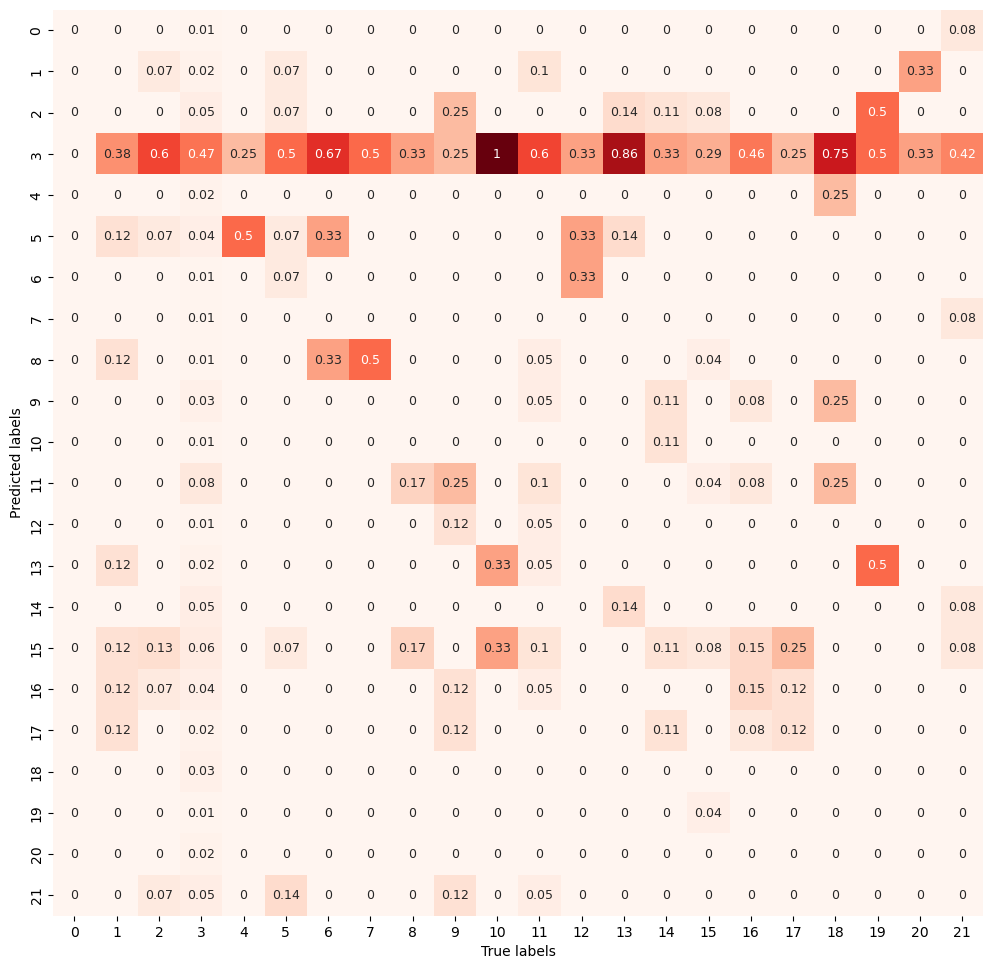

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=[12,12], dpi=100)
sns.heatmap(np.round(cm/np.sum(cm, axis=1), 2),
            cbar=False,
            annot=True,
            annot_kws={"size": 9},
            cmap=plt.cm.Reds)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [11]:
print(label_names)

['Abdomen and Chest', 'Ankle', 'Cervical Spine', 'Chest', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand', 'Hand and Wrist', 'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Lumbar Spine and Thoracic Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull', 'Thoracic Spine', 'Wrist']


In [12]:
print(y_true)

[ 0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  7  7
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 13 13 13 13 13 13 13 14
 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 17 17 18 18 18 18 19 19 20 20 20 21 21 21 21 21 21 21 21 21 21
 21 21]


<AxesSubplot:>

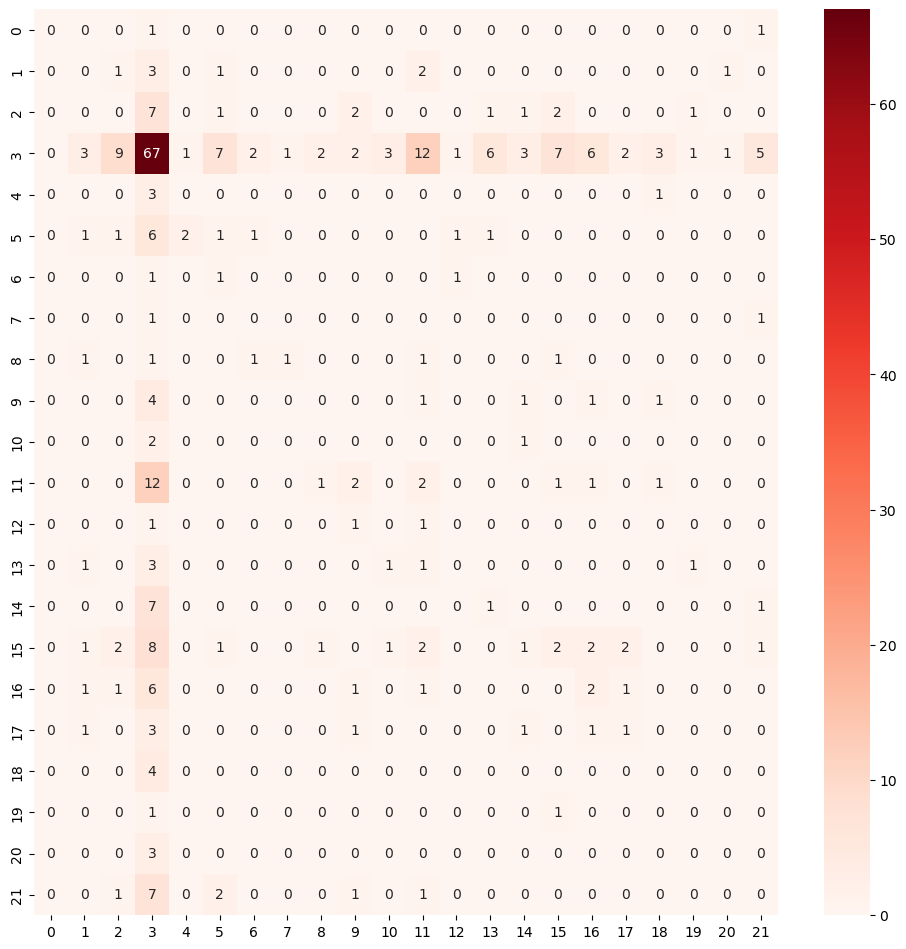

In [15]:
plt.figure(figsize=[12,12], dpi=100)
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True)

In [22]:
c=np.zeros((22,22))
cj=np.sum(cm,axis=1)

for i in range(len(cm)):
    for j in range(len(cm)):
        c[i][j]=np.round((cm[i][j]/cj[i]),2)

<AxesSubplot:>

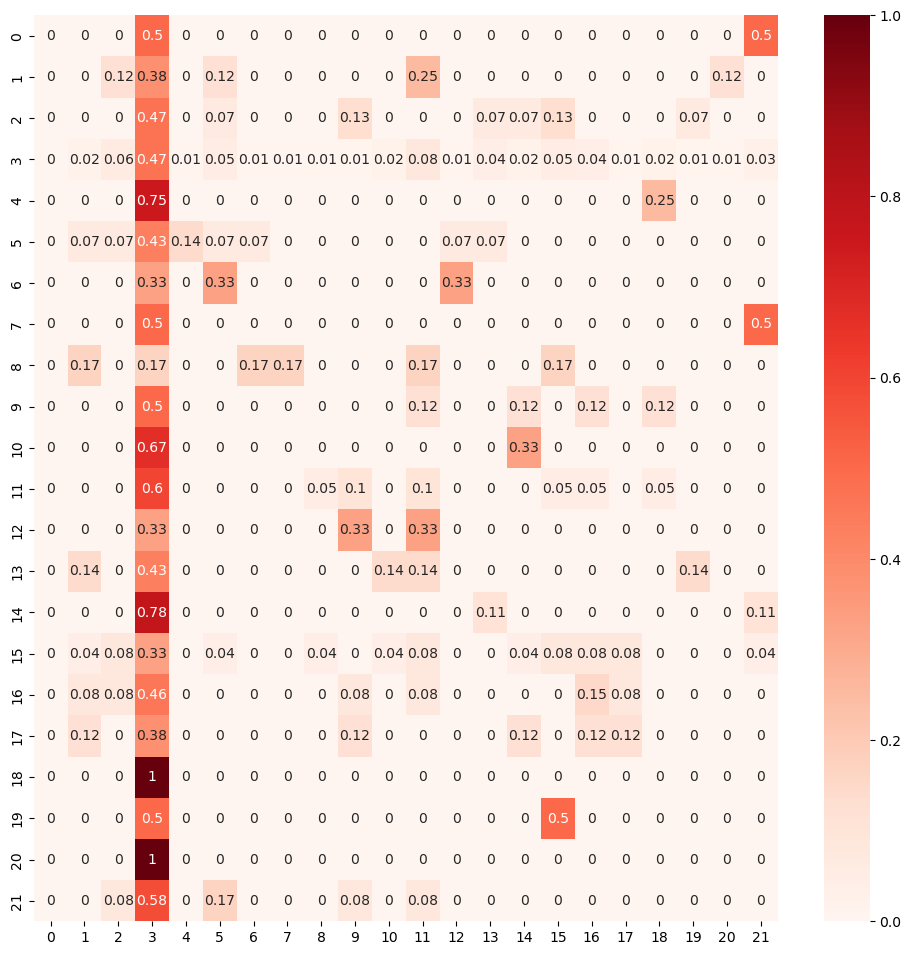

In [23]:
plt.figure(figsize=[12,12], dpi=100)
sns.heatmap(c, cmap=plt.cm.Reds, annot=True)

In [19]:
print(cj)

[  2   8  15 144   4  14   3   2   6   8   3  20   3   7   9  24  13   8
   4   2   3  12]
